<a href="https://colab.research.google.com/github/Pralay6/placementPrediction_ML/blob/main/Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


**EDA**

In [ ]:
import matplotlib.pyplot as plt

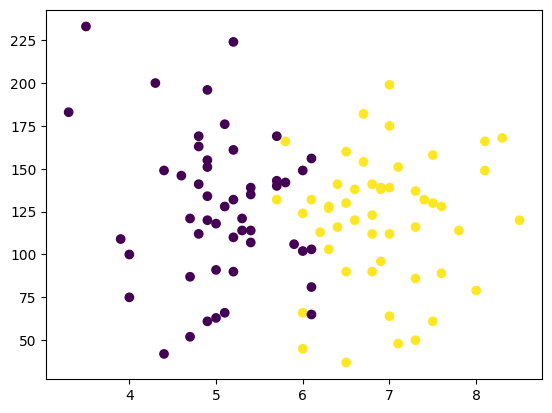

In [ ]:
plt.scatter(df['cgpa'],df['iq'] , c=df['placement'])

**Spliting input data**

In [ ]:
X = df.iloc[: , 0:2]
y = df.iloc[: , -1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-1.79217361, -1.22378939],
       [ 0.35247736, -0.20419516],
       [ 1.15672147,  0.31803603],
       [ 0.44183782, -0.85076711],
       [-0.00496447,  0.61645386],
       [ 0.79927964, -0.7015582 ],
       [-0.00496447, -0.55234929],
       [ 1.87160513,  0.61645386],
       [ 0.62055873,  1.43710288],
       [-0.80920858, -1.44760276],
       [ 0.08439599,  0.79053092],
       [-1.07728995,  1.1138169 ],
       [ 1.42480284, -0.87563527],
       [-1.16665041, -0.0798544 ],
       [-1.07728995,  0.96460799],
       [-0.9879295 ,  1.78525701],
       [ 1.24608193,  0.19369527],
       [-0.71984813, -0.85076711],
       [-0.9879295 , -1.57194352],
       [ 0.8886401 ,  0.36777234],
       [ 0.70991919, -0.85076711],
       [-1.79217361, -0.60208559],
       [ 0.17375644, -0.27879962],
       [ 0.53119827, -0.10472255],
       [-0.9879295 ,  0.24343158],
       [-0.71984813,  0.19369527],
       [ 0.70991919, -0.30366777],
       [-1.25601087,  0.5418494 ],
       [-0.71984813,

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.8886401 , -0.30366777],
       [ 0.08439599,  0.19369527],
       [-0.71984813, -0.35340407],
       [ 1.33544239, -1.57194352],
       [-0.89856904, -1.52220722],
       [-0.9879295 ,  0.66619016],
       [ 0.70991919, -0.0301181 ],
       [ 1.33544239,  0.14395897],
       [-0.63048767, -0.25393146],
       [-2.41769681,  1.46197103]])

**Train model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_test

29    1
71    1
92    0
44    1
7     0
89    0
0     1
83    1
46    0
17    0
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
 from mlxtend.plotting import plot_decision_regions

<Axes: >

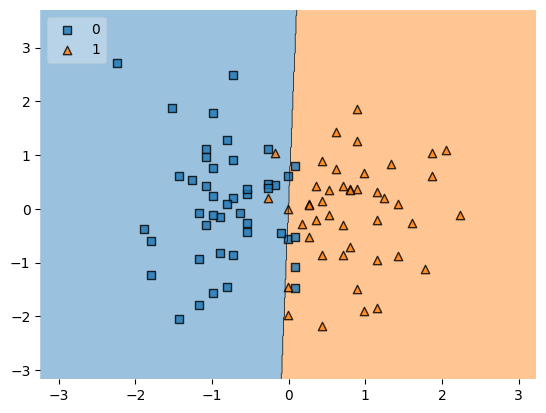

In [ ]:
plot_decision_regions(X_train,y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl' , 'wb'))